# 00_asymtools

In [1]:
import pandas as pd
import numpy as np


In [2]:
fn = '/Users/cchu/Desktop/phd_work/droplet_DNA/data/xSDS_variants.txt'

In [11]:
df = pd.read_csv(fn, sep='\t')
df = df.rename(columns={'Chr': 'chr', 'Pos': 'pos', 'Ref': 'ref_allele', 'Alt': 'Alt_allele'})

In [20]:
df.head()

,chr,pos,ref_allele,Alt_allele,NV,NR,VAF
0,chr1,16856,A,G,5,44,0.113636
1,chr1,108540,A,C,7,44,0.159091
2,chr1,127491,T,G,16,70,0.228571
3,chr1,268043,C,T,11,78,0.141026
4,chr1,275337,T,C,6,55,0.109091


In [19]:
new_maf_fn = f"{fn.rsplit('/', 1)[0]}/{fn.rsplit('/', 1)[1].split('.')[0]}.reformat.txt"
print(new_maf_fn)

/Users/cchu/Desktop/phd_work/droplet_DNA/data/xSDS_variants.reformat.txt


In [21]:
df.to_csv(new_maf_fn, sep='\t', index=None)

In [54]:
liftover_df = pd.concat([df[['chr', 'pos']], df['pos'] + 1, df.reset_index()['index'].rename('name')], axis=1)
liftover_df.head()

,chr,pos,pos,name
0,chr1,16856,16857,0
1,chr1,108540,108541,1
2,chr1,127491,127492,2
3,chr1,268043,268044,3
4,chr1,275337,275338,4


Added the index as the "name" column of bed file. This is for mapping back the lift over coordinates

In [48]:
liftover_fn = f"{fn.rsplit('/', 1)[0]}/{fn.rsplit('/', 1)[1].split('.')[0]}.bed.hg38.txt"
liftover_fn

'/Users/cchu/Desktop/phd_work/droplet_DNA/data/xSDS_variants.bed.hg38.txt'

In [49]:
liftover_df.to_csv(liftover_fn, sep='\t', index=None, header=None)

Input to liftover tool: https://genome.ucsc.edu/cgi-bin/hgLiftOver

In [58]:
hg19_liftover_fn = '/Users/cchu/Desktop/phd_work/droplet_DNA/data/hglft_genome_2ebae1_b526b0.bed'
hg19_liftover_df = pd.read_csv(hg19_liftover_fn, sep='\t', header=None)
hg19_liftover_df.columns = ['chr', 'pos', 'pos2', 'orig_idx']
hg19_liftover_df.head()

,chr,pos,pos2,orig_idx
0,chr1,16856,16857,0
1,chr1,108540,108541,1
2,chr1,127491,127492,2
3,chr1,237794,237795,3
4,chr1,245088,245089,4


In [59]:
hg38_df = pd.read_csv(new_maf_fn, sep='\t')
print(hg38_df.shape)
hg38_df.head()

(68881, 7)


,chr,pos,ref_allele,Alt_allele,NV,NR,VAF
0,chr1,16856,A,G,5,44,0.113636
1,chr1,108540,A,C,7,44,0.159091
2,chr1,127491,T,G,16,70,0.228571
3,chr1,268043,C,T,11,78,0.141026
4,chr1,275337,T,C,6,55,0.109091


In [121]:
66236/68881

0.9616004413408632

In [81]:
hg19_df = hg38_df.loc[hg19_liftover_df['orig_idx']]
hg19_df['pos'] = hg19_liftover_df['pos'].tolist()
hg19_df['patient'] = 'xSDS'
print(hg19_df.shape)
hg19_df.head()

(66236, 8)


,chr,pos,ref_allele,Alt_allele,NV,NR,VAF,patient
0,chr1,16856,A,G,5,44,0.113636,xSDS
1,chr1,108540,A,C,7,44,0.159091,xSDS
2,chr1,127491,T,G,16,70,0.228571,xSDS
3,chr1,237794,C,T,11,78,0.141026,xSDS
4,chr1,245088,T,C,6,55,0.109091,xSDS


In [82]:
hg19_fn = f"{fn.rsplit('/', 1)[0]}/{fn.rsplit('/', 1)[1].split('.')[0]}.reformat.hg19.txt"
hg19_fn

'/Users/cchu/Desktop/phd_work/droplet_DNA/data/xSDS_variants.reformat.hg19.txt'

In [83]:
hg19_df.to_csv(hg19_fn, sep='\t', index=None)

# Asymtools


In [13]:
from asymtools.annot import *
from asymtools.plotting import *


In [84]:
m = preprocess_maf(hg19_fn)

Assuming hg19...
Assuming hg19...


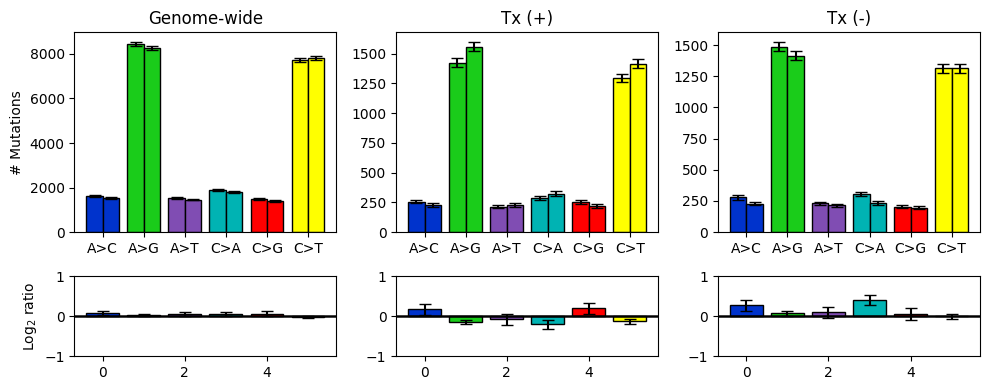

In [119]:
# Plot asymmetries of mutation counts
twin_bar_txplot(m)
plt.show()

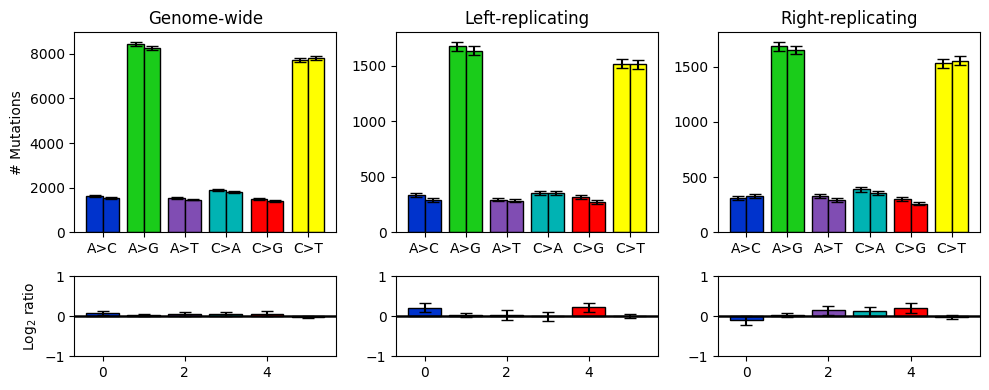

In [120]:
twin_bar_repplot(m)
plt.show()

  name  x    n1    n2            color       N1       N2           r1  \
0  A>C  0   336   289    [0, 0.2, 0.8]  1197784  1196157   280.518023   
1  A>G  1  1677  1637  [0.1, 0.8, 0.1]  1197784  1196157  1400.085491   
2  A>T  2   294   285  [0.5, 0.3, 0.7]  1197784  1196157   245.453270   
3  C>A  3   354   353    [0, 0.7, 0.7]  1241828  1223246   285.063632   
4  C>G  4   319   272        [1, 0, 0]  1241828  1223246   256.879375   

       r1_sd           r2      r2_sd     ratio  ratio_sd  logratio  
0  15.303513   241.607080  14.212181  1.161051  0.093148  0.215431  
1  34.189128  1368.549446  33.824871  1.023043  0.035545  0.032867  
2  14.315125   238.263037  14.113484  1.030178  0.085636  0.042893  
3  15.150961   288.576460  15.359375  0.987827  0.074302 -0.017670  
4  14.382484   222.359198  13.482507  1.155245  0.095343  0.208199  


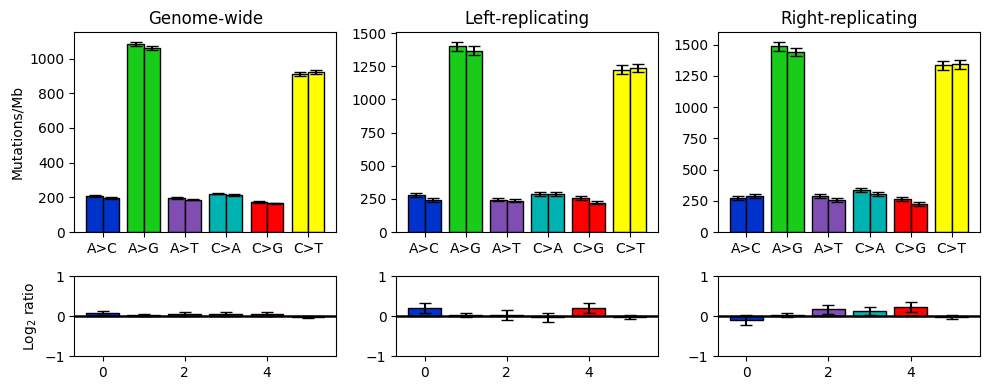

In [87]:
ax,res = twin_bar_repplot(m,normalization='exome')
print(res[1].head())
plt.show()

In [71]:
import seaborn as sns

In [88]:
snp_df = m[(m['ref_allele'].str.len() == 1) & (m['newbase'].str.len() == 1)]
snp_df['mut'].value_counts()

A>G    8448
T>C    8276
G>A    7834
C>T    7741
C>A    1889
G>T    1815
A>C    1617
T>G    1532
A>T    1527
C>G    1476
T>A    1464
G>C    1406
Name: mut, dtype: int64

In [93]:
m

,chr,pos,ref_allele,newbase,NV,NR,VAF,patient,targ_idx,txplus,txminus,is_left,is_right,mut
0,1,16856,A,G,5,44,0.113636,xSDS,0,0,0,0,0,A>G
1,1,108540,A,C,7,44,0.159091,xSDS,5,0,0,1,0,A>C
2,1,127491,T,G,16,70,0.228571,xSDS,6,0,0,1,0,T>G
3,1,167215,G,GTT,9,59,0.152542,xSDS,8,0,0,1,0,G>GTT
4,1,216815,A,G,7,65,0.107692,xSDS,10,0,0,1,0,A>G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66231,24,59027750,G,A,8,93,0.086022,xSDS,154776,0,0,0,0,G>A
66232,24,59027762,T,C,8,90,0.088889,xSDS,154776,0,0,0,0,T>C
66233,24,59028036,G,C,10,95,0.105263,xSDS,154776,0,0,0,0,G>C
66234,24,59032089,A,G,5,72,0.069444,xSDS,154776,0,0,0,0,A>G


<Axes: xlabel='mut', ylabel='VAF'>

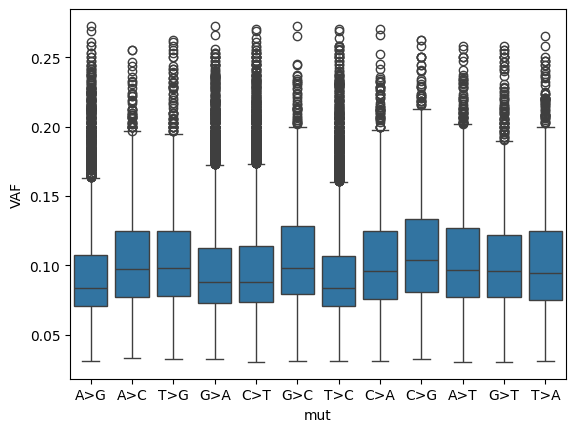

In [92]:
sns.boxplot(snp_df, x='mut', y='VAF')

In [94]:
missing_df = hg38_df.loc[~hg38_df.index.isin(hg19_liftover_df['orig_idx'])]

In [96]:
missing_df.shape

(2645, 7)

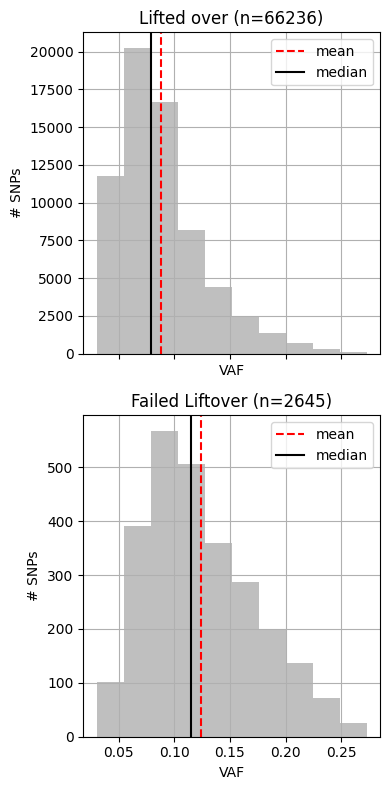

In [122]:
fig, axes = plt.subplots(2, figsize=(4, 8), sharex=True)
m['VAF'].hist(color='gray', alpha=0.5, ax=axes[0])
axes[0].axvline(m['VAF'].mean(), c='r', linestyle='--', label='mean')
axes[0].axvline(m['VAF'].median(), c='k', linestyle='-', label='median')

missing_df['VAF'].hist(color='gray', alpha=0.5, ax=axes[1])
axes[1].axvline(missing_df['VAF'].mean(), c='r', linestyle='--', label='mean')
axes[1].axvline(missing_df['VAF'].median(), c='k', linestyle='-', label='median')

axes[0].set_xlabel('VAF')
axes[1].set_xlabel('VAF')
axes[0].set_ylabel('# SNPs')
axes[1].set_ylabel('# SNPs')

axes[0].set_title(f'Lifted over (n={m.shape[0]})')
axes[1].set_title(f'Failed Liftover (n={missing_df.shape[0]})')
axes[0].legend()
axes[1].legend()
plt.tight_layout()
plt.show()